<a href="https://colab.research.google.com/github/jensenloke/ai4i/blob/master/AI4I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI4I Quiz 1

In [0]:
import numpy as np

In [0]:
x = np.array([[1, 3, 8], [3, 2, 6]])
y = np.array([[6, 4, 2], [0, 5, 1]])
print(x-y)

[[-5 -1  6]
 [ 3 -3  5]]


# AI41 Quiz 2

In [0]:
!ls

'My Drive'


In [0]:
cd 'My Drive'

/content/drive/My Drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
#created a file to store text.csv for import testing
df_main = pd.read_csv('text.csv', sep='#',index_col=0)

In [0]:
df_main.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Outcome
patient_id,,,,,,,
163,0,114,80,34,285,0.167,0
348,3,116,0,0,0,0.187,0
395,4,158,78,0,0,0.803,1
187,8,181,68,36,495,0.615,1


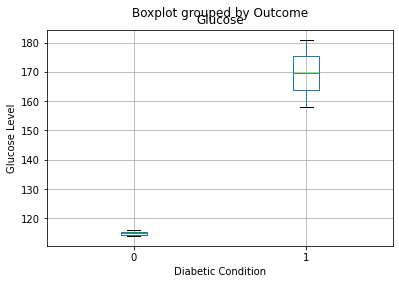

In [0]:
df = df_main
df.boxplot(column = ['Glucose'], by=['Outcome'])
plt.xlabel('Diabetic Condition')
plt.ylabel('Glucose Level')
plt.show()

In [0]:
pd.cut

In [0]:
patient_id = {'patient_id': [163,348,395,187,525],'BMI':[34.1,35.0,25.9,22.5,31.6],'Age':[38,43,24,21,24]}                                

In [0]:
df2 = pd.DataFrame(patient_id)

In [0]:
df2.head()

,patient_id,BMI,Age
0,163,34.1,38
1,348,35.0,43
2,395,25.9,24
3,187,22.5,21
4,525,31.6,24


In [0]:
df3 = df2.set_index('patient_id')
df3.head()

,BMI,Age
patient_id,,
163,34.1,38
348,35.0,43
395,25.9,24
187,22.5,21
525,31.6,24


In [0]:
combined = df_main.join(df3, on='patient_id').sort_values(by=['BMI','Age'])

In [0]:
combined

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Outcome,BMI,Age
patient_id,,,,,,,,,
187,8,181,68,36,495,0.615,1,22.5,21
395,4,158,78,0,0,0.803,1,25.9,24
163,0,114,80,34,285,0.167,0,34.1,38
348,3,116,0,0,0,0.187,0,35.0,43


In [0]:
All of the above

# AI4I Quiz 3

In [0]:
!ls

candyhierarchy2017.csv


In [0]:
cd drive/My Drive/Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [0]:
cd Quiz3

/content/drive/My Drive/Colab Notebooks/AI4I/Quiz3


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('candyhierarchy2017.csv', encoding='latin-1')

In [0]:
df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we donÕt know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,...,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | ReeseÕs Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,...,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,...,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,"Reese's crispy crunchy bars, 5th avenue bars, ...",NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY,...,DESPAIR,JOY,JOY,MEH,JOY,NaN,JOY,JOY,DESPAIR,NaN,MEH,DESPAIR,JOY,

In [0]:
df.shape

(2460, 120)

In [0]:
df['Q3: AGE'].isnull().sum()

84

In [0]:
df1 = df.copy()

In [0]:
df['Q3: AGE'].unique()

array([nan, '44', '49', '40', '23', '53', '33', '43', '56', '64', '37',
       '59', '48', '54', '36', '45', '25', '34', '35', '38', '58', '50',
       '47', '16', '52', '63', '65', '41', '27', '31', '61', '46', '42',
       '62', '29', '39', '32', '28', '69', '67', '30', '22', '26', '51',
       '70', '24', '18', '19', 'Old enough', '57', '60', '66', '12',
       'Many', '55', '72', '?', '21', '11', 'no', '9', '68', '20', '6',
       '10', '71', '90', '13', '45-55', '312', '99', '7', 'hahahahaha',
       '88', '39.4', '74', '102', 'older than dirt', '17', '15', '8',
       '75', '5u', 'Enough', 'See question 2', '24-50', '14', 'Over 50',
       '100', '76', '1000', 'sixty-nine', '46 Halloweens.', 'ancient',
       '77', 'OLD', 'old', '73', '70 1/2', '1', 'MY NAME JEFF', '4',
       '59 on the day after Halloween', 'old enough', 'your mom',
       'I can remember when Java was a cool new language', '60+'],
      dtype=object)

In [0]:
#dropping nan for q3 age
df2 = df1.dropna(subset=['Q3: AGE'], axis=0, how='any')


In [0]:
df2.shape

(2376, 120)

In [0]:
# discover problems in data
df2['Q3: AGE'].unique()

array(['44', '49', '40', '23', '53', '33', '43', '56', '64', '37', '59',
       '48', '54', '36', '45', '25', '34', '35', '38', '58', '50', '47',
       '16', '52', '63', '65', '41', '27', '31', '61', '46', '42', '62',
       '29', '39', '32', '28', '69', '67', '30', '22', '26', '51', '70',
       '24', '18', '19', 'Old enough', '57', '60', '66', '12', 'Many',
       '55', '72', '?', '21', '11', 'no', '9', '68', '20', '6', '10',
       '71', '90', '13', '45-55', '312', '99', '7', 'hahahahaha', '88',
       '39.4', '74', '102', 'older than dirt', '17', '15', '8', '75',
       '5u', 'Enough', 'See question 2', '24-50', '14', 'Over 50', '100',
       '76', '1000', 'sixty-nine', '46 Halloweens.', 'ancient', '77',
       'OLD', 'old', '73', '70 1/2', '1', 'MY NAME JEFF', '4',
       '59 on the day after Halloween', 'old enough', 'your mom',
       'I can remember when Java was a cool new language', '60+'],
      dtype=object)

In [0]:
print(df2['Q3: AGE'])
print('-------------------------------------------')
print(df2['Q3: AGE'].unique())

1       44
2       49
3       40
4       23
6       53
        ..
2455    24
2456    33
2457    26
2458    58
2459    66
Name: Q3: AGE, Length: 2376, dtype: object
-------------------------------------------
['44' '49' '40' '23' '53' '33' '43' '56' '64' '37' '59' '48' '54' '36'
 '45' '25' '34' '35' '38' '58' '50' '47' '16' '52' '63' '65' '41' '27'
 '31' '61' '46' '42' '62' '29' '39' '32' '28' '69' '67' '30' '22' '26'
 '51' '70' '24' '18' '19' 'Old enough' '57' '60' '66' '12' 'Many' '55'
 '72' '?' '21' '11' 'no' '9' '68' '20' '6' '10' '71' '90' '13' '45-55'
 '312' '99' '7' 'hahahahaha' '88' '39.4' '74' '102' 'older than dirt' '17'
 '15' '8' '75' '5u' 'Enough' 'See question 2' '24-50' '14' 'Over 50' '100'
 '76' '1000' 'sixty-nine' '46 Halloweens.' 'ancient' '77' 'OLD' 'old' '73'
 '70 1/2' '1' 'MY NAME JEFF' '4' '59 on the day after Halloween'
 'old enough' 'your mom'
 'I can remember when Java was a cool new language' '60+']


In [0]:
df2['Q3: AGE'] = pd.to_numeric(df2['Q3: AGE'], errors='coerce')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
df2['Q3: AGE'].mean()

42.605444491705654

In [0]:
df2['Q3: AGE'].unique()

array([  44. ,   49. ,   40. ,   23. ,   53. ,   33. ,   43. ,   56. ,
         64. ,   37. ,   59. ,   48. ,   54. ,   36. ,   45. ,   25. ,
         34. ,   35. ,   38. ,   58. ,   50. ,   47. ,   16. ,   52. ,
         63. ,   65. ,   41. ,   27. ,   31. ,   61. ,   46. ,   42. ,
         62. ,   29. ,   39. ,   32. ,   28. ,   69. ,   67. ,   30. ,
         22. ,   26. ,   51. ,   70. ,   24. ,   18. ,   19. ,    nan,
         57. ,   60. ,   66. ,   12. ,   55. ,   72. ,   21. ,   11. ,
          9. ,   68. ,   20. ,    6. ,   10. ,   71. ,   90. ,   13. ,
        312. ,   99. ,    7. ,   88. ,   39.4,   74. ,  102. ,   17. ,
         15. ,    8. ,   75. ,   14. ,  100. ,   76. , 1000. ,   77. ,
         73. ,    1. ,    4. ])

In [0]:
#dropping nan again after coercing
df3 = df2.dropna(subset=['Q3: AGE'], axis=0, how='any')
print(df3.shape)
print(df3['Q3: AGE'].unique())


(2351, 120)
[  44.    49.    40.    23.    53.    33.    43.    56.    64.    37.
   59.    48.    54.    36.    45.    25.    34.    35.    38.    58.
   50.    47.    16.    52.    63.    65.    41.    27.    31.    61.
   46.    42.    62.    29.    39.    32.    28.    69.    67.    30.
   22.    26.    51.    70.    24.    18.    19.    57.    60.    66.
   12.    55.    72.    21.    11.     9.    68.    20.     6.    10.
   71.    90.    13.   312.    99.     7.    88.    39.4   74.   102.
   17.    15.     8.    75.    14.   100.    76.  1000.    77.    73.
    1.     4. ]


In [0]:
#calculating standard deviation
std = df3['Q3: AGE'].std()
mean = df3['Q3: AGE'].mean()
print(std, mean)

23.844665492989364 42.605444491705654


In [0]:
upper, lower = 2*std + df4.mean(), df4.mean() - 2*std
print(upper)
print(lower)

90.29477547768438
-5.083886494273074


In [0]:
# Trim the outliers
trimmed_df = df3[(df3['Q3: AGE'] > lower) & (df3['Q3: AGE'] < upper)]

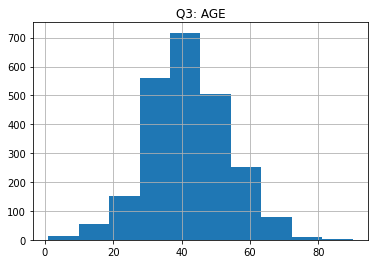

In [0]:
# The trimmed box plot
trimmed_df[['Q3: AGE']].hist()
plt.show()

##there are 10 bins!!! :) :) 

# AI4I Quiz 4


**Background**
---
Your manager has asked you to analyze some data from the HR department.
The table below shows values from some of the features available.

---
<table>
<tr>
<th>MarriedID	</th><th>GenderID</th>	<th>DeptID	<th>PayRate	<th>EngagementSurvey	<th>EmpSatisfaction<th>	SpecialProjectsCount<th>	DaysLateLast30<th>	Termd<th>
</tr>
<td> 0 <td>	1.0 <td>	0.0<td>	1.0	<td>28.50	<td>2.04<td>	2.0	<td>6.0	<td>0.0<td>	0.0 <td> 
</tr>
<tr> 
<td> 1	<td>0.0<td>	1.0<td>	1.0	<td>23.00<td>5.00	<td>4.0	<td>4.0	<td>0.0	<td>0.0<td>
</tr>
<tr> 
2	<td>0.0<td>	1.0	<td>1.0	<td>29.00<td>3.90	<td>5.0	<td>5.0<td>	0.0<td>	0.0<td>
</tr>
<tr> 
3	<td>1.0<td>0.0<td>	1.0<td>	21.50<td>	3.24<td>	3.0	<td>4.0	<td>NaN	<td>1.0 
</tr>
<tr> 
4	<td>0.0	<td>0.0<td>	1.0<td>	16.56<td>	5.00<td>	3.0<td>	5.0	<td>0.0<td>	0.0 <td>
</tr>
</table>

-----

One of the first things you want to look at are the Terminated employees (Termd column) and how engaged they are compared to those still under employment. You are curious about the overall data spread (exact data points are not necessary). Which plot would you use to show this?

*Box plot*

You then want to look at what the employees are earning. To do that, you plot the ECDF (Empirical Cumulative Distribution Function) graph for the hourly pay rate. From the chart below, what proportion of the employees are earning $40 or less per hour.

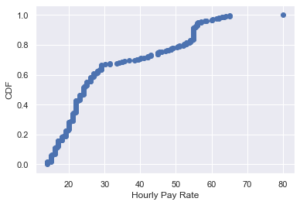

*70%*

Your manager wanted to know whether married employess were more satisfied or less satisfied compared to unmarried employees. You generated the Employee satisfication confidence intervals for the two groups of employees. For the married employees, the 95% condfidence intervals were [3.59, 3.91] with a mean of 3.75. For the unmarried employees, the mean satisfaction rating was 3.98 with 95% confidence intervals [3.85, 4.11]. What is your opinion?

There is no statistical difference between the married and unmarried employees.

You want to study if there exists a correlation between the pay rate and the employee engagement. To improve your confidence in the calculation, you decide to apply bootstrapping before calculating the replicate. Complete the function below:



```
# def draw_bs_pairs (x, y, func, size=1):
  # Set up array of indices
  inds = np.arange(len(x))
  # Initialize the array of replicates
  bs_rep= np.empty(size)
  for i in range(size):
    bs_inds = np.random.choice
(inds, size = len(inds))
    bs_x = x[bs_inds]
    bs_y = y[bs_inds]
    bs_rep[i] = func([bs_x,bs_y][bs_x,bs_y])
  return bs_rep
```



The full dataset has 103 features in total. You decide to try a few dimension reduction techniques. Why do you want to do that?

####The data will be less complex.\n
####The data will require less disk space.
####It will take less computation time to process the data.
####During modeling, there is a lower chance of overfitting.
####**All of the above**

# AI4I Quiz 5

In [0]:
#Use this cell to import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Mounting Drive
%cd My Drive/Colab Notebooks/AI4I/home-data-for-ml-course

For Questions 1 – 7: you may refer to SUP-3: Regression’s ‘Exploratory Data Analysis’ section for more details.

In [0]:
#Q1. How many total attributes are there in train.csv?
#Loading the CSV file into Pandas
train_df = pd.read_csv('train.csv')
print(train_df.shape)
print('It has ' + str(train_df.shape[1]-1)+ ' features!')
#It has 80 features, 1st Column is Index

In [0]:
#Q2. How many of these attributes contain categorical values?
print('It has ' + str(train_df.describe(exclude=[np.number]).shape[1])+ ' categorical values!')

It has 43 categorical values!


In [0]:
#Q3. What is the median value for the target attribute, SalePrice?
print('The median sales price is: ' + str(train_df['SalePrice'].median()) + '.')

The median sales price is: 163000.0.


In [0]:
#Q4. How many uniques values are for the SaleType attribute?
print('The number of unique values in SaleType is: ' + str(len(train_df['SaleType'].unique())) + '.')

The number of unique values in SaleType is: 9.


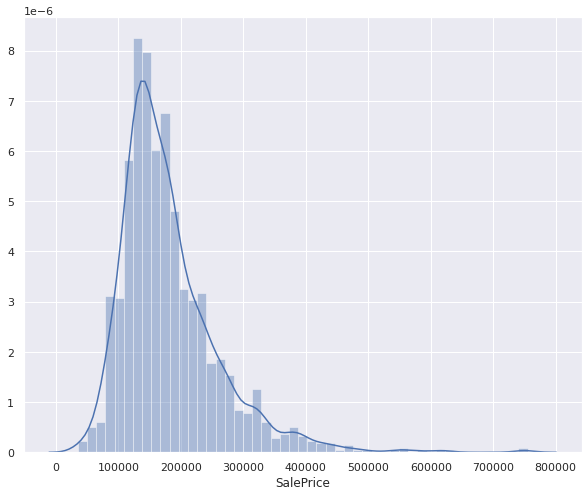

In [0]:
#Q5. How would describe the shape of the histogram for SalePrice?

#Setting the Plotsize
plt.figure(figsize=[10, 8])

#Plot with Seaborn
sns.distplot(train_df['SalePrice'])

#Result is positively skewed (Leans left)

In [0]:
#Q6. For the numerical attributes shown below, sort them by DECREASING order of correlation with SalePrice.
train_df_qn6 = train_df[['YearBuilt', '1stFlrSF', 'OverallQual','BsmtFinSF1','SalePrice']]
print('---This is the ranking in DESCENDING CORR---')
print(train_df_qn6.corr().iloc[:,-1].sort_values(ascending=False))

---This is the ranking in DESCENDING CORR---
SalePrice      1.000000
OverallQual    0.790982
1stFlrSF       0.605852
YearBuilt      0.522897
BsmtFinSF1     0.386420
Name: SalePrice, dtype: float64


In [0]:
#Q7. Which CATEGORICAL attribute has the most missing values?

cols = ['PoolQC','MiscFeature','LotFrontage']
category_ms = train_df[cols]
print(category_ms.head())
print(type(category_ms))
category_ms_counts = category_ms.isna().sum()  
print('-----')
print(type(category_ms_counts))
print(category_ms_counts)
print('-----')
print(category_ms_counts.idxmax() + ' has the most missing values')

  PoolQC MiscFeature  LotFrontage
0    NaN         NaN         65.0
1    NaN         NaN         80.0
2    NaN         NaN         68.0
3    NaN         NaN         60.0
4    NaN         NaN         84.0
<class 'pandas.core.frame.DataFrame'>
-----
<class 'pandas.core.series.Series'>
PoolQC         1453
MiscFeature    1406
LotFrontage     259
dtype: int64
-----
PoolQC has the most missing values


For Questions 8 – 13: you may refer to SUP-3: Regression’s ‘Building a Linear Regression Model’ section for more details.

In [0]:
#Q8. When splitting your input data into train and test datasets, what should you do if the data is ordered e.g. sorted by a user id or one of the other attributes?
#Add shuffle=True parameter to train_test_split()



1.   Nothing. It has no effect on the outcome of the model training.
2.   Add shuffle=True parameter totrain_test_split()
3.   Change the value for random_state parameter in train_test_split
4.   Add stratify parameter to train_test_split()


In [0]:
#Q9. In reference to the python script built in this lesson, how would you examine the Linear Regression coefficients (or weights) of the trained model?
#print(model.named_steps['linearregression'].coef_)

1.   print(model.coef_)
2.   Cannot be done as the model is hidden within the pipeline.
3.   print(model.named_steps['linearregression'].coef_)

In [0]:
#Q10. Instead of using sklearn.metrics.r2_score, how you calculate the coefficient of determination (r2 score) in this script?
#model.named_steps['linearregression'].score(X,y)

1.   **model.named_steps['linearregression'].score(X,y)**
2.   model.score(X,y)
3.   There is no alternative way.

In [0]:
#Q11. Use the following configuration in the python script:
# Apply GetAge() and StandardScaler() to  numerical_features
# Follow the parameters described in the lesson for test_train_split i.e. test_size=0.3, random_state=42
# Rounded to the nearest thousand dollars, what is the Root Mean Square error (RMSE) when the model is scored on x_test?
#Refer to SUP3 notebook: (might be wrong?)

print(np.sqrt(1930680857.92))

43939.51362862361


In [0]:
#Q12. Using the same program configuration as described in the previous question, what it the coefficient of determination, rounded to 2 decimal places, when scored against x_test?

Refer to SUP3 notebook: 0.74

In [0]:
#Q13. An overfitted model is typically characterized by …
#Low Bias, High Variance

For Questions 14 – 17: you may refer to SUP-3: Regression’s ‘Understanding Bias/Variance Trade-off’ section for more details.

In [0]:
#Q14. What kind of error is caused by randomness or natural variabilities in the data generated by a system?
#Variance Error

In [0]:
#Q15. The discovery of bias and variance decomposition led to the development of regularization techniques in regression algorithms.
#True

In [0]:
#Q16. To the nearest 2 decimal place, what is the coefficient of determination (R2) value for the lower order model (i.e. Linear Regression)  calculated for the training data?
#Refer to: Ex_BiasVariance_soln.ipynb
#Lower Order Model Errors, RMSE = 4.0538e+04, R2 = 0.69498
#R2 to 2DF = 0.70 #Attempt 1
#This is incorrect, next attempt try 0.69
#R2 to 2DF = 0.69 #Attempt 2
#This is incorrect, next attempt?
#R2 to 2DF = 0.88 #Correct!

# Lower Order Model Errors, RMSE = 3.2534e+04, R2 = 0.87566
# Higher Order Model Errors, RMSE = 5812.0, R2 = 0.99603

In [0]:
#Q17 Based on the validation curve at the end of the exercise, what will be the best polynomial order to use when developing the model?
#3, Refer to chart below

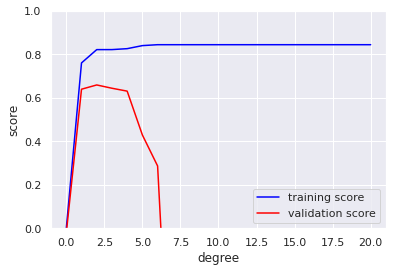

For Questions 18 – 21: you may refer to SUP-3: Regression’s ‘Building a KNN Regressor’ section for more details.

For questions related to the Exercise python script, please use the same preprocessing steps defined in the lesson i.e.

GetAge(), SimpleImputer() and StandardScaler() for the numerical features
OneHotEncoder() for the categorical features

In [0]:
#Q18. Which GridSearchCV attribute will give us the best score from the parameter search?
#best_score_

In [0]:
#Q19. Using the code and parameters as defined in the lesson, what is the optimum number of neighbors found?
#9

In [0]:
#Q20. To the nearest 2 decimal places, what is the r2 score on the test dataset?
0.82

In [0]:
#Q21. The new model using KNN is better than the model in lesson 2 which uses Linear Regression.
#True

In [0]:
#Q22. How many rows are there in the original dataset (from ‘Telco_customer_churn.xlsx’)?
#7043,32 (.shape in dataset)

In [0]:
#Q23. How many rows of data are missing from the TotalCharges columns?
#11

In [0]:
#Q24. How would you describe the type of data that is contained in the Dependents column?
#Categorical

In [0]:
#Q25. To the nearest 2 decimal places, what is the mean tenure duration for the dataset AFTER removing the null data?
#32.42

In [0]:
#Q26. Make density plots of the numerical features of the data, grouping by the ChurnLabel value. Which feature does this plot refer to ?
#TenureMonths

In [0]:
#Q27. Based on the exercise, which of the following is NOT a necessary import:
#from sklearn.preprocessing import Normalizer

In [0]:
#Q28. Of the customers loaded from the dataset, how many churned?
#1869

In [0]:
#Q29. Which of the following is a categorical feature as defined in the exercise?
#DeliveryProtection

In [0]:
#Q30. What is the Precision score calculated on the test data (to the nearest 2 decimal places)?
#Attempt 1: 0.63 

In [0]:
#Q31. What is the area under the curve (AUC) for the Receiver Operating Characteristics (ROC) graph when evaluated on the test data (to the nearest 2 decimal places)?
##Attempt 1: 0.72

In [0]:
#Q32. According to the provided Datacamp tutorial, which two metrics are commonly used to evaluate Classification models?
#Precision, Recall

In [0]:
#Q33. Based on the current version of the imbalance-learn library, what parameter can you use to control the amount of oversampling of the minority class?
#sampling_strategy=0.5

In [0]:
#Q34. Applying RandomOverSampler as described in the Exercise, the AUC (to the nearest 2 decimal places) for the ROC curve is              than the model using the imbalanced data from the previous lesson?
#Same

In [0]:
#Q35. Using GridSearchCV, what the optimum max_depth found for the Decision Tree model?
#3

In [0]:
#Q36. What was the optimum value found for the max_features parameter in the Random Forest model?
#0.6

In [0]:
#Q37. Which parameter can we add to VotingClassifier to use soft voting to predict the class labels?
#voting='soft'

In [0]:
#Q38. Based on the AUC of the ROC curve, the ensembled model built using the VotingClassifier is the best model compared to its constituent models.
#True

# AI4I Quiz 6


In [0]:
#What are the main drawbacks when using dimension reduction techniques on your data?
#All of the above

In [0]:
#Imagine performing PCA on a 1000 dimension dataset and you set the explained variance to 95%. How many dimensions will the resulting dataset have?
#Trick Question! Depends on the dataset

In [0]:
#How should you NOT select the optimum number of clusters k in a K-Means Clustering technique?
#B only

In [0]:
#Complete the code snippet below to perform hierarchical clustering on the dataset. Assume that scipy.cluster has been imported for you.

# my_cluster = [Blank](dataset, 
#                      method='complete')

#hierarchy.linkage

In [0]:
#Which statement about Non-negative Matrix Factorization (NMF) is not true?
#NMF can hand handle real numbers as input features

# AI4I Quiz 7

In [0]:
# Create a notebook in Google Colaboratory. Install and import Tensorflow 2.0 and the required libraries. Load the MNIST_fashion dataset. 
# Q1: What is the width of each picture in pixels?
# The width of each picture is 28 px.

In [0]:
# Build a CNN to classifiy the different classes in the dataset. Use what you learnt about convolution layers, activation functions, and dropout.
# What activation should you use in the final layer?
#(softmax,softmax)

In [0]:
#What is the next step after the forward pass when you are training a neural network? (Hint: You only need to answer with one word)
#backpropagation

In [0]:
#If you have a high training accuracy but a low validation accuracy, what is likely to be happening? (Hint: You only need to answer with one word)
#overfitting

In [0]:
#When using gradient descent, we try to get as close to the 
# (global) minima as possible (Hint: You only need to answer with one word)

# AI4I Quiz 8

In [0]:
#With SQL, how do you select all the columns from a table named SALES?
#SELECT * FROM SALES

In [0]:
#Which SQL keywords specify the sorting direction of the result set retrieved with the ORDER BY clause?
#ASC, DESC

In [0]:
#You are in the shell. We have a file called ‘sample’. We want to highlight only the lines that do not contain the character ‘a’, but the result should be in reverse order. We then want to write the resulting output to a file called ‘myoutput’.
#What commands do you issue to shell? (Use Cat, Grep and Sort Commands to help you)
#grep a sample -v | sort -r >> myoutput